<a href="https://colab.research.google.com/github/wintera71/BEACO2N-Modules/blob/main/Lesson%205%3A%20Air%20Pollutant%20Exposure/IN_CLASS_Air_Pollutant_Exposure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEACO2N Notebook 5a: Highways and Pollutants**

Notebook developed by: *Arushi Sharma, Anna Winter, Skye Pickett, Alec Morgan, Lan Dinh, Su Min Park, Amy Castillo*


### Learning Outcomes
Working through this notebook, you will learn about:
1. NO and NO2 concentrations at locations close to and far from highways
1. The Weekend Effect
1. Plotting time series data
1. DateTime in Pandas
1. Using `groupby` to summarize data


## Table of Contents
1. Predictions and Notebook Setup
>1.1 Topic Introduction: Highway Pollution
<br>1.2 Notebook Setup

1. NOx Concentration Time Series
>2.1 NO Concentrations
<br> 2.2 NO2 Concentrations
1. The Weekend Effect
> 3.1 Splitting DataFrames into Weekend/Weekdays
<br> 3.2 Averaging Concentrations
<br> 3.3 Plotting Concentrations


*Note: In this notebook, there are some more advanced topics that are "optional". This means you can just read over these sections; don't worry about fully understanding these parts unless you are really interested. They may be useful later in the course, but for now they are not necessary, so feel free to just skim the parts labelled "Optional"!*

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

##1. Predictions and Notebook Setup
###1.1 Topic Introduction: Highway Pollution
In this notebook, we'll take a look at NO and NO2 concentrations collected at **two BEACO2N sites - one close to the highway, and one far away from the highway.** We'll look at a time series of concentrations at both sites. <br>Take a moment and **predict how the highway will affect both NO and NO2 concentrations, and give an explanation for your prediction.**



**YOUR PREDICTION HERE:**<br>
Double click on this cell and replace this cell with your ideas.

**Another consideration:**<br>The number of heavy duty trucks on the road significantly **decreases** on the weekends. As trucks are a major source of NOx (NO + NO2), **NOx  concentrations decrease on the weekends**. This is known as the "***weekend effect***". In this notebook, we'll also take a look at how *highways* affect the *weekend effect*.

###1.2 Notebook Setup
####1.2.1 Importing Packages
Let's start by loading some packages we will need. Most of these we've learned about in our last two notebooks! Remember that they need to imported in any notebook we want to work in. **Run the cell below to import them.**

>*Reminder:* To run a cell...
* Click the **Play icon** in the left gutter of the cell **OR**
* Click **Shift+Enter** or **Shift+Return** on your computer keyboard to run the cell and move focus to the next cell

In [ ]:
# Packages used for visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical computation
import numpy as np
from decimal import Decimal

# Manuplating data in form of series or dataframes
import pandas as pd

# Manipulating fields that are date or time
import datetime
from datetime import time

Since we're going to be creating visualizations in this notebook, it can be easiest to set some parameters in advance. Consider this like setting the stage for a show, so everything will be shown in the same view. **Run the cell below.** If any warning pops up, press "run anyway".

If you get any error saying "matplotlib is not defined", that means you haven't run the cell above this. Run that one *first* then the one below next.

In [ ]:
# Using this cell, we will be defining some matplotlib parameters for the plots that we will be creating.
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.figsize'] = [20, 14]
plt.rcParams["axes.labelweight"] = "bold"
np.set_printoptions(suppress=True)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.facecolor"]= '#FFFFFF'

####1.2.2 Importing Data
Now we will load in data from two [BEACO2N](http://beacon.berkeley.edu/about/) sites: *Laney* and *San Pablo*. <br>**Laney is only *40 meters* from the highway, while San Pablo is located *2.3 kilometers* from the highway.**

Let's load in the data from the Laney site first: ***Run the cell below***

In [ ]:
## Laney data
filename_close ="http://128.32.208.8/node/45/measurements_all/csv?name=Laney%20College&interval=60&variables=no2_corrected_no_negatives,no_corrected_new_no_negatives&start=2021-07-01%2000:00:00&end=2021-11-01%2000:00:00&chart_type=measurement"
data_close  = pd.read_csv(filename_close, on_bad_lines='skip')
data_close['timestamp']=pd.to_datetime(data_close['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
data_close.index=data_close['timestamp']
data_close = data_close.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)

# Renaming the columns of the dataframe
data_close = data_close.rename(columns={'no2_corrected_no_negatives': 'no2', 'no_corrected_new_no_negatives': 'no'})
data_close[:10]
data_close['nox'] = data_close['no'] + data_close['no2']


We saved the data from the Laney site in a DataFrame called **`data_close`** since it is ***closer* to the highway**.

In [ ]:
data_close.head(5)

,no2,no,nox
timestamp,,,
2021-07-01 00:00:00,4.454621,0.428815,4.883436
2021-07-01 01:00:00,4.116860,0.087911,4.204771
2021-07-01 02:00:00,4.276865,0.261237,4.538102
2021-07-01 03:00:00,4.529445,1.015281,5.544727
2021-07-01 04:00:00,5.879583,3.182384,9.061967


Now, let's load in the data from the San Pablo site: ***Run the cell below***

In [ ]:
## Laney data
filename_far ="http://128.32.208.8/node/43/measurements_all/csv?name=BAAQMD%20sanpablo&interval=60&variables=no2_corrected_no_negatives,no_corrected_new_no_negatives&start=2021-07-01%2000:00:00&end=2021-11-01%2000:00:00&chart_type=measurement"
data_far  = pd.read_csv(filename_far, on_bad_lines='skip')
data_far['timestamp']=pd.to_datetime(data_far['local_timestamp'],format='%Y-%m-%d  %H:%M:%S')
data_far.index=data_far['timestamp']
data_far = data_far.drop(['local_timestamp','epoch','datetime','node_id','node_file_id','timestamp'],axis = 1)

# Renaming the columns of the dataframe
data_far = data_far.rename(columns={'no2_corrected_no_negatives': 'no2', 'no_corrected_new_no_negatives': 'no'})
data_far[:10]
data_far['nox'] = data_far['no'] + data_far['no2']


We saved the data from the San Pablo site in a DataFrame called **`data_far`** since it is ***farther* from the highway**.

In [ ]:
data_far.head(5)

,no2,no,nox
timestamp,,,
2021-07-01 01:00:00,1.917576,1.288525,3.206101
2021-07-01 03:00:00,1.773097,1.211445,2.984543
2021-07-01 04:00:00,2.062756,1.310457,3.373212
2021-07-01 05:00:00,2.251414,1.441441,3.692855
2021-07-01 06:00:00,2.395042,1.471442,3.866485


***
##2. NOx Concentration Time Series
Now that we have the data loaded, let's take a look at a time series of both NO and NO2 concentrations. We'll start with NO.

###2.1 NO Concentrations
Read through each line of the cell below to understand what makes the produced visualization.

In [ ]:
data_close.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-10-31 15:00:00', '2021-10-31 16:00:00',
               '2021-10-31 17:00:00', '2021-10-31 18:00:00',
               '2021-10-31 19:00:00', '2021-10-31 20:00:00',
               '2021-10-31 21:00:00', '2021-10-31 22:00:00',
               '2021-10-31 23:00:00', '2021-11-01 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=2953, freq=None)

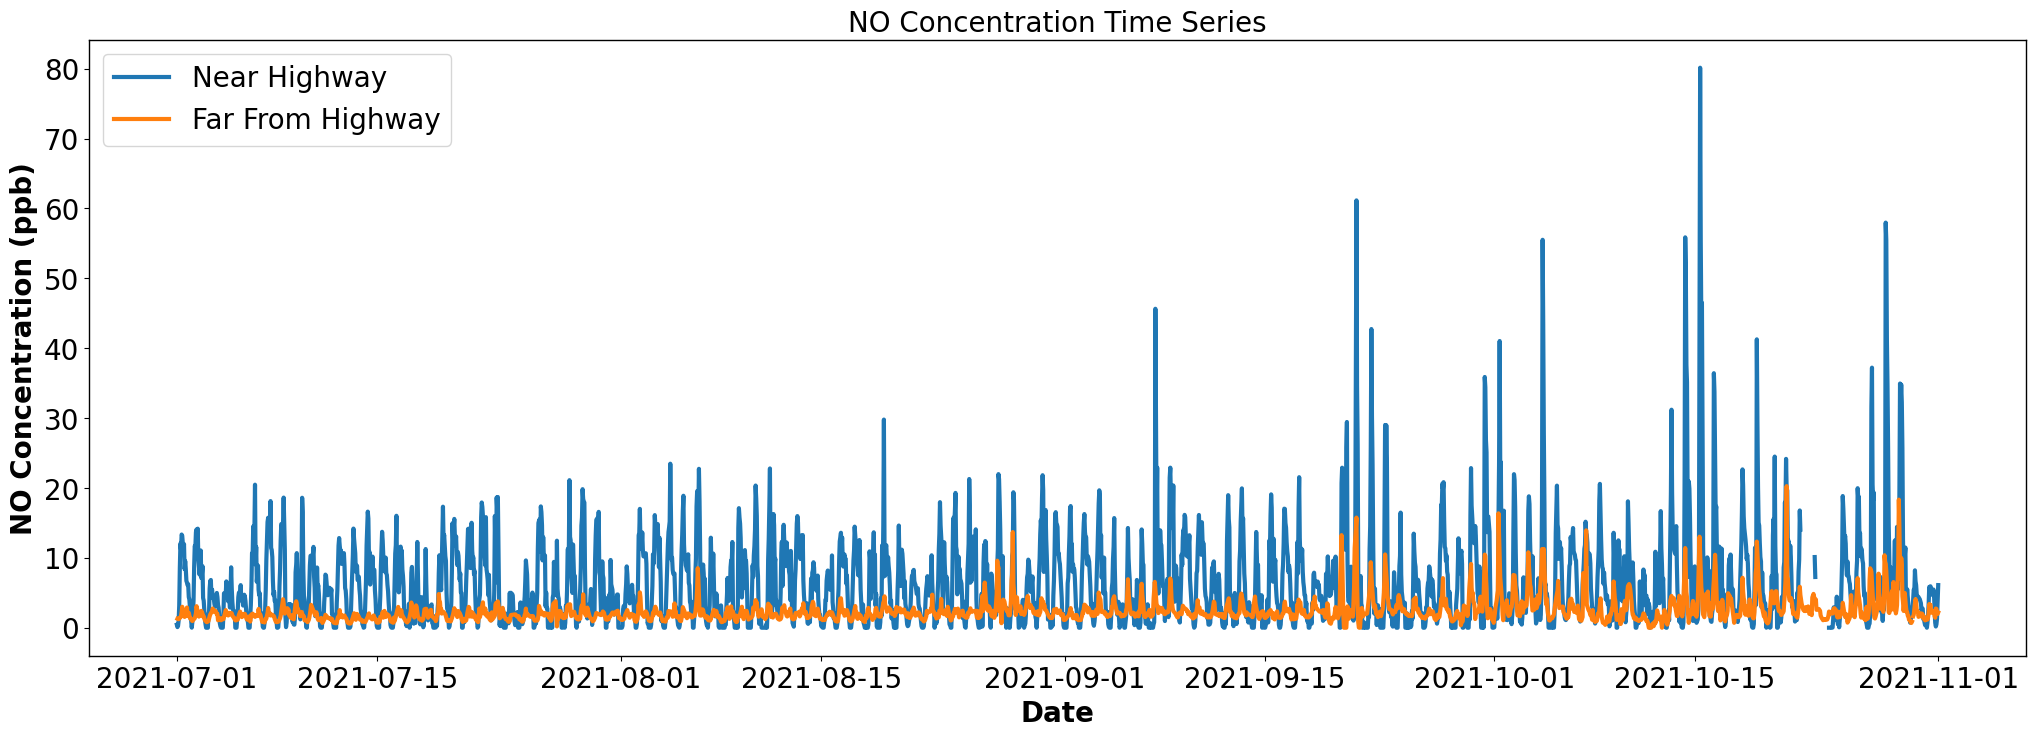

In [ ]:
plt.figure(figsize = (25, 8)) # indicates figure size
plt.plot(data_close.index, data_close['no'], label = 'Near Highway') # plotting Laney site data
plt.plot(data_far.index, data_far['no'], label = 'Far From Highway') # plotting San Pablo site data
plt.legend(fontsize = 20) # indicates font size of legend
plt.xlabel("Date") # label for x axis
plt.ylabel("NO Concentration (ppb)") # label for y axis
plt.title("NO Concentration Time Series"); # title of graph

This is useful for making any comparisons between two variables!

**What do you observe?** Write a few sentences considering these 2 questions:<br>
> 1. How do highways affect NO concentrations?
> 2. Why do highways have this effect on NO concentrations?

**Your answer:**<br>
Double-click on this cell and replace this text with your response.

###2.2 NO2 Concentrations
Now let's take a look at NO2 concentrations. Read through each line of the cell below to understand what makes the produced visualization.

Text(0.5, 1.0, 'NO2 Concentration Time Series')

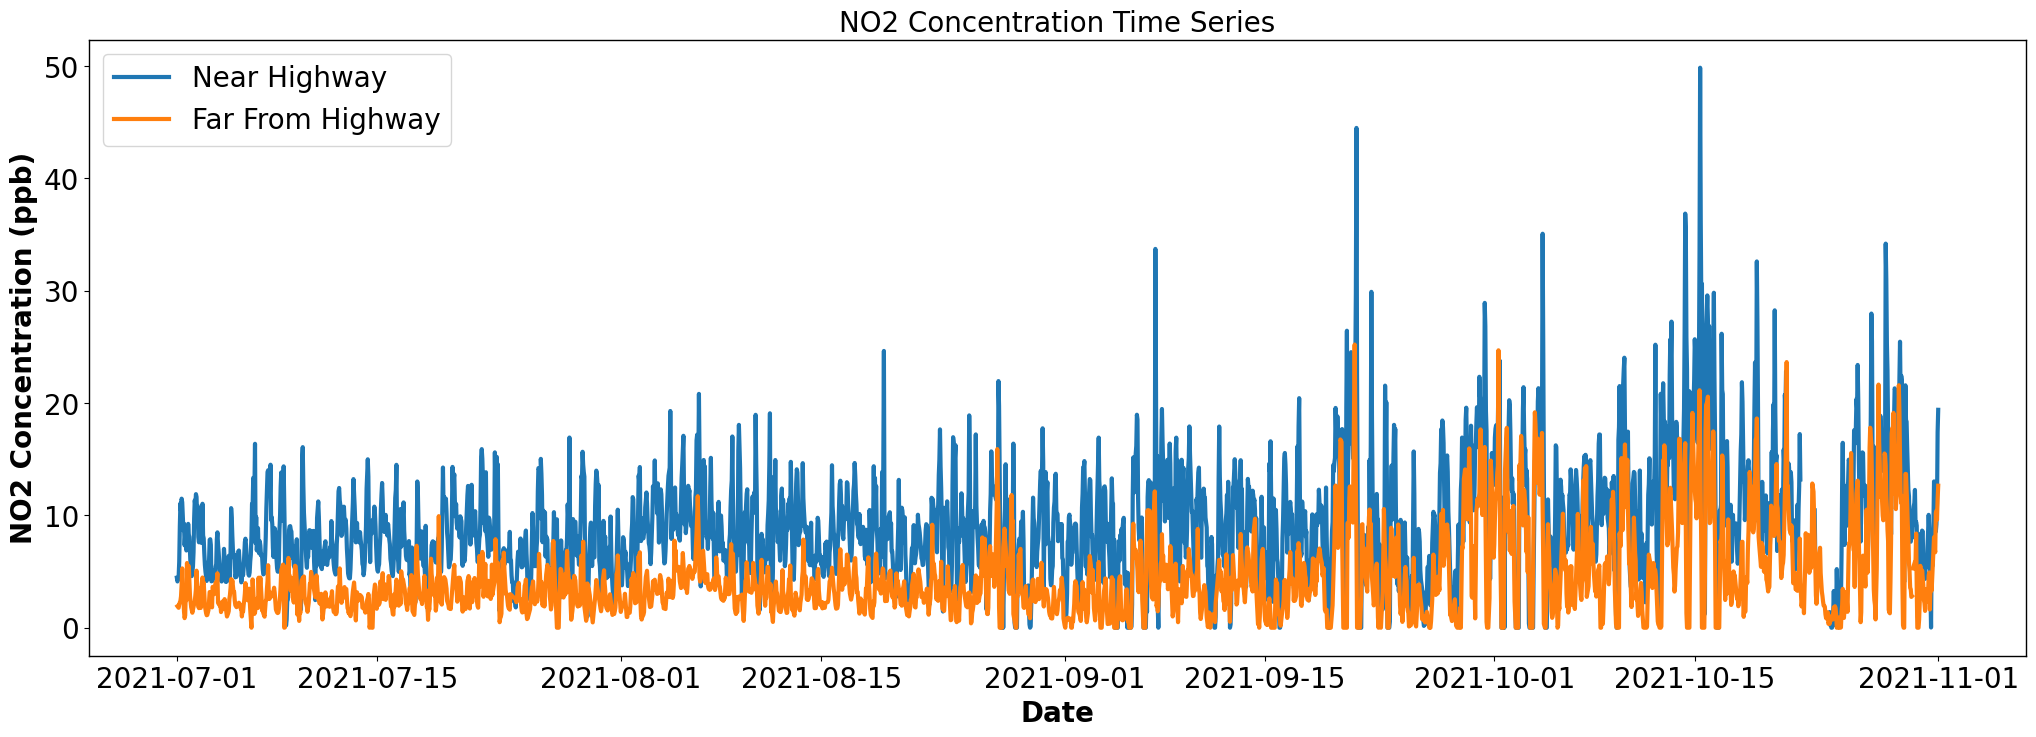

In [ ]:
plt.figure(figsize = (25, 8))  # indicates figure size
plt.plot(data_close.index, data_close['no2'], label = 'Near Highway')  # plotting Laney site data
plt.plot(data_far.index, data_far['no2'], label = 'Far From Highway') # plotting San Pablo site data
plt.legend(fontsize = 20)  # indicates font size of legend
plt.xlabel("Date") # label for x axis
plt.ylabel("NO2 Concentration (ppb)") # label for y axis
plt.title("NO2 Concentration Time Series") # title of graph

**What do you observe?** Write a few sentences considering these 2 questions:<br>
> 1. How do highways affect NO2 concentrations?
> 2. What are some policy actions that have been taken to try to reduce traffic-related NO and NO2 emissions?

**Your answer:**<br>
Double-click on this cell and replace this text with your response.

***
##3. The Weekend Effect

We will now investigate the *Weekend Effect* at each of these sites. We will plot how NOx concentrations change throughout the day at both Laney and San Pablo on the weekends and weekdays.

In the 2 cells below, we use **DateTime** which is built into pandas. DateTime has attributes `.time` and `.day_name` which we can use to extract those corresponding values from the `timestamp` column, which is in DateTime format. Knowing the day of the week and the hour of the day will allow us to more easily identify weekdays and weekends.
<br><br>
The code cell below creates 2 new columns in the `data_close` DataFrame called **`day_of_week`** and **`hour`**.

In [ ]:
data_close['day_of_week'] = data_close.index.day_name()
data_close['hour'] = data_close.index.time
data_close.head(5)

,no2,no,nox,day_of_week,hour
timestamp,,,,,
2021-07-01 00:00:00,4.454621,0.428815,4.883436,Thursday,00:00:00
2021-07-01 01:00:00,4.116860,0.087911,4.204771,Thursday,01:00:00
2021-07-01 02:00:00,4.276865,0.261237,4.538102,Thursday,02:00:00
2021-07-01 03:00:00,4.529445,1.015281,5.544727,Thursday,03:00:00
2021-07-01 04:00:00,5.879583,3.182384,9.061967,Thursday,04:00:00


In [ ]:
data_far['day_of_week'] = data_far.index.day_name()
data_far['hour'] = data_far.index.time
data_far.head(5)

,no2,no,nox,day_of_week,hour
timestamp,,,,,
2021-07-01 01:00:00,1.917576,1.288525,3.206101,Thursday,01:00:00
2021-07-01 03:00:00,1.773097,1.211445,2.984543,Thursday,03:00:00
2021-07-01 04:00:00,2.062756,1.310457,3.373212,Thursday,04:00:00
2021-07-01 05:00:00,2.251414,1.441441,3.692855,Thursday,05:00:00
2021-07-01 06:00:00,2.395042,1.471442,3.866485,Thursday,06:00:00


Now both `data_close` and `data_far` have the 2 new columns added. We will now separate the DataFrames into weekend and weekday data.

###3.1 Splitting DataFrames into Weekend/Weekdays

*The code in the cell below is more advanced than you need to know. <br>Optional: `|` is a representation of the ["or" operator](https://realpython.com/python-or-operator/) which is a boolean operation used in the code cell below.*<br>
**Run the cell below.**

In [ ]:
# Run this cell
close_weekdays = data_close[(data_close['day_of_week']=='Monday') |(data_close['day_of_week']=='Tuesday') | (data_close['day_of_week']=='Wednesday') | (data_close['day_of_week']=='Thursday') | (data_close['day_of_week']=='Friday')]
close_weekdays.head(3)

,no2,no,nox,day_of_week,hour
timestamp,,,,,
2021-07-01 00:00:00,4.454621,0.428815,4.883436,Thursday,00:00:00
2021-07-01 01:00:00,4.116860,0.087911,4.204771,Thursday,01:00:00
2021-07-01 02:00:00,4.276865,0.261237,4.538102,Thursday,02:00:00


^ **`close_weekdays`** includes the rows of `data_close` (Laney site) with data collected on a *weekday*.

In [ ]:
# Run this cell
far_weekdays = data_far[(data_far['day_of_week']=='Monday') |(data_far['day_of_week']=='Tuesday') | (data_far['day_of_week']=='Wednesday') | (data_far['day_of_week']=='Thursday') | (data_far['day_of_week']=='Friday')]
far_weekdays.head(3)

,no2,no,nox,day_of_week,hour
timestamp,,,,,
2021-07-01 01:00:00,1.917576,1.288525,3.206101,Thursday,01:00:00
2021-07-01 03:00:00,1.773097,1.211445,2.984543,Thursday,03:00:00
2021-07-01 04:00:00,2.062756,1.310457,3.373212,Thursday,04:00:00


^ **`far_weekdays`** includes the rows of `data_far` (San Pablo site) with data collected on a *weekday*.

In [ ]:
close_weekends = data_close[(data_close['day_of_week']=='Saturday') |(data_close['day_of_week']=='Sunday')]
close_weekends.head(3)

,no2,no,nox,day_of_week,hour
timestamp,,,,,
2021-07-03 00:00:00,4.984344,0.533972,5.518315,Saturday,00:00:00
2021-07-03 01:00:00,4.540605,0.000000,4.540605,Saturday,01:00:00
2021-07-03 02:00:00,4.166585,0.000000,4.166585,Saturday,02:00:00


^ **`close_weekends`** includes the rows of `data_close` (Laney site) with data collected on a *weekend*.

In [ ]:
far_weekends = data_far[(data_far['day_of_week']=='Saturday') |(data_far['day_of_week']=='Sunday')]
far_weekends.head(3)

,no2,no,nox,day_of_week,hour
timestamp,,,,,
2021-07-03 01:00:00,1.301070,0.870811,2.171882,Saturday,01:00:00
2021-07-03 02:00:00,1.110340,0.795264,1.905604,Saturday,02:00:00
2021-07-03 03:00:00,1.136806,0.823209,1.960015,Saturday,03:00:00


^ **`far_weekends`** includes the rows of `data_far` (San Pablo site) with data collected on a *weekend*.

###3.2 Averaging Concentrations

To look at the daily profile, we will average the concentrations across **each hour**.

In the following cells, we use the function **`groupby`** to resort the information in our DataFrame. A translation of the first line of code below, `close_weekdays.groupby('hour').mean()`, would read "We take the `close_weekdays` DataFrame and "group by" the *hour* values. This creates collections of rows with each unique hour value, then we find the mean (average) of each collection."

*Optional/Advanced: `.mean()` is the "aggregation function" that is always required with the [groupby function](https://towardsdatascience.com/all-about-pandas-groupby-explained-with-25-examples-494e04a8ef56?gi=0cb29220a2d3).*<br> **Run the cell below. We repeat the groupby function call on each of the 4 DataFrames we've created thus far.**

In [ ]:
## Finding average value for each unique hour in dataframe
# Repeated for each of the dataframes we've made
grouped_weekdays_close = close_weekdays.groupby('hour').mean(numeric_only=True)
grouped_weekdays_far = far_weekdays.groupby('hour').mean(numeric_only = True)

grouped_weekends_close = close_weekends.groupby('hour').mean(numeric_only=True)
grouped_weekends_far = far_weekends.groupby('hour').mean(numeric_only=True)

Ignore any "FutureWarning" that may arise.<br> Let's take a look at what one of these DataFrames look like now that they've been grouped and averaged by hour.

In [ ]:
grouped_weekends_far

,no2,no,nox
hour,,,
00:00:00,3.402036,1.462052,4.864088
01:00:00,3.444998,1.507960,4.952958
02:00:00,3.613949,1.565308,5.179257
03:00:00,3.192841,1.392082,4.584923
04:00:00,2.927389,1.473208,4.400597
05:00:00,3.888898,1.689078,5.577976
06:00:00,4.178607,1.871423,6.050030
07:00:00,5.394553,2.678130,8.072683
08:00:00,4.782563,3.442607,8.225170


Notice that this DataFrame (and the other 3 grouped ones) have 24 rows that each represent one of the 24 hours in a day!

### 3.3 Plotting Concentrations



Now that we have our data cleaned, we can plot the daily profiles of weekend and weekday concentrations at the sites near and far from the highway.

Let's start with the site **NEAR the highway:** *Read through each line of the cell below to understand what makes the produced visualization.*

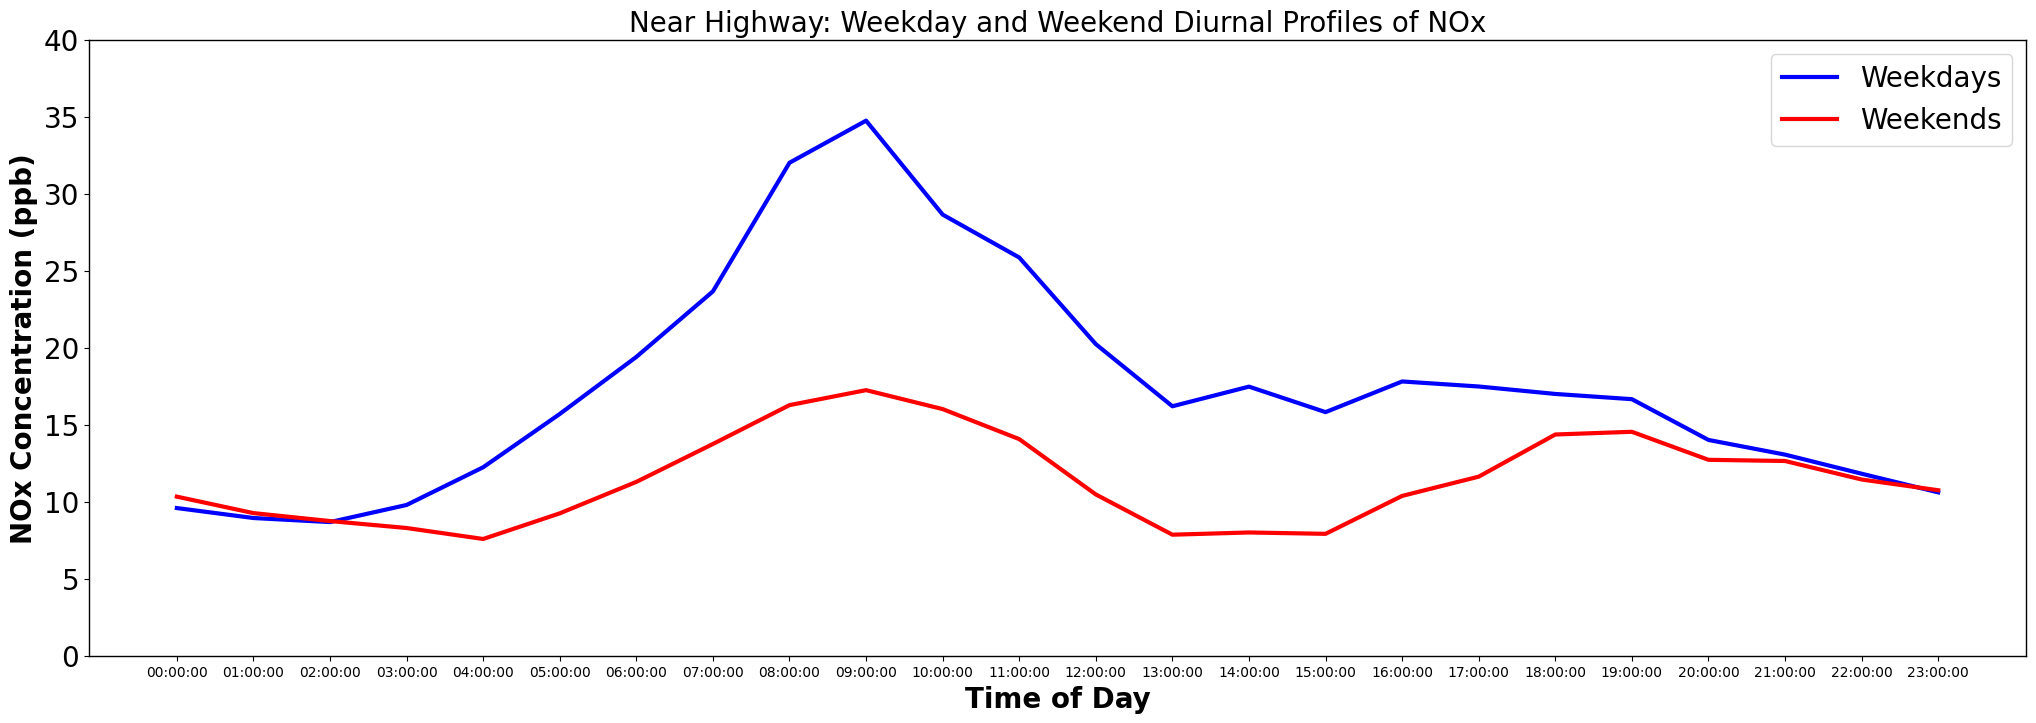

In [ ]:
## Plotting the close to highway site:
plt.figure(figsize = (25, 8))
plt.plot(grouped_weekdays_close.index.astype('str'), grouped_weekdays_close['nox'], label = "Weekdays", color = 'blue') # plots grouped_weekdays_close
plt.plot(grouped_weekends_close.index.astype('str'), grouped_weekends_close['nox'], label = "Weekends", color = 'red') # plots grouped_weekends_close
plt.legend(fontsize = 20) # specifies what legend looks like
plt.xticks(fontsize = 10) # specifies how many x ticks for x-axis to have
plt.ylim(0, 40) # sets the range for the y axis
plt.xlabel("Time of Day") # x-axis label
plt.ylabel("NOx Concentration (ppb)") # y-axis label
plt.title("Near Highway: Weekday and Weekend Diurnal Profiles of NOx"); # title label

Now let's plot the site **FAR from the highway:** *Read through each line of the cell below to understand what makes the produced visualization.*

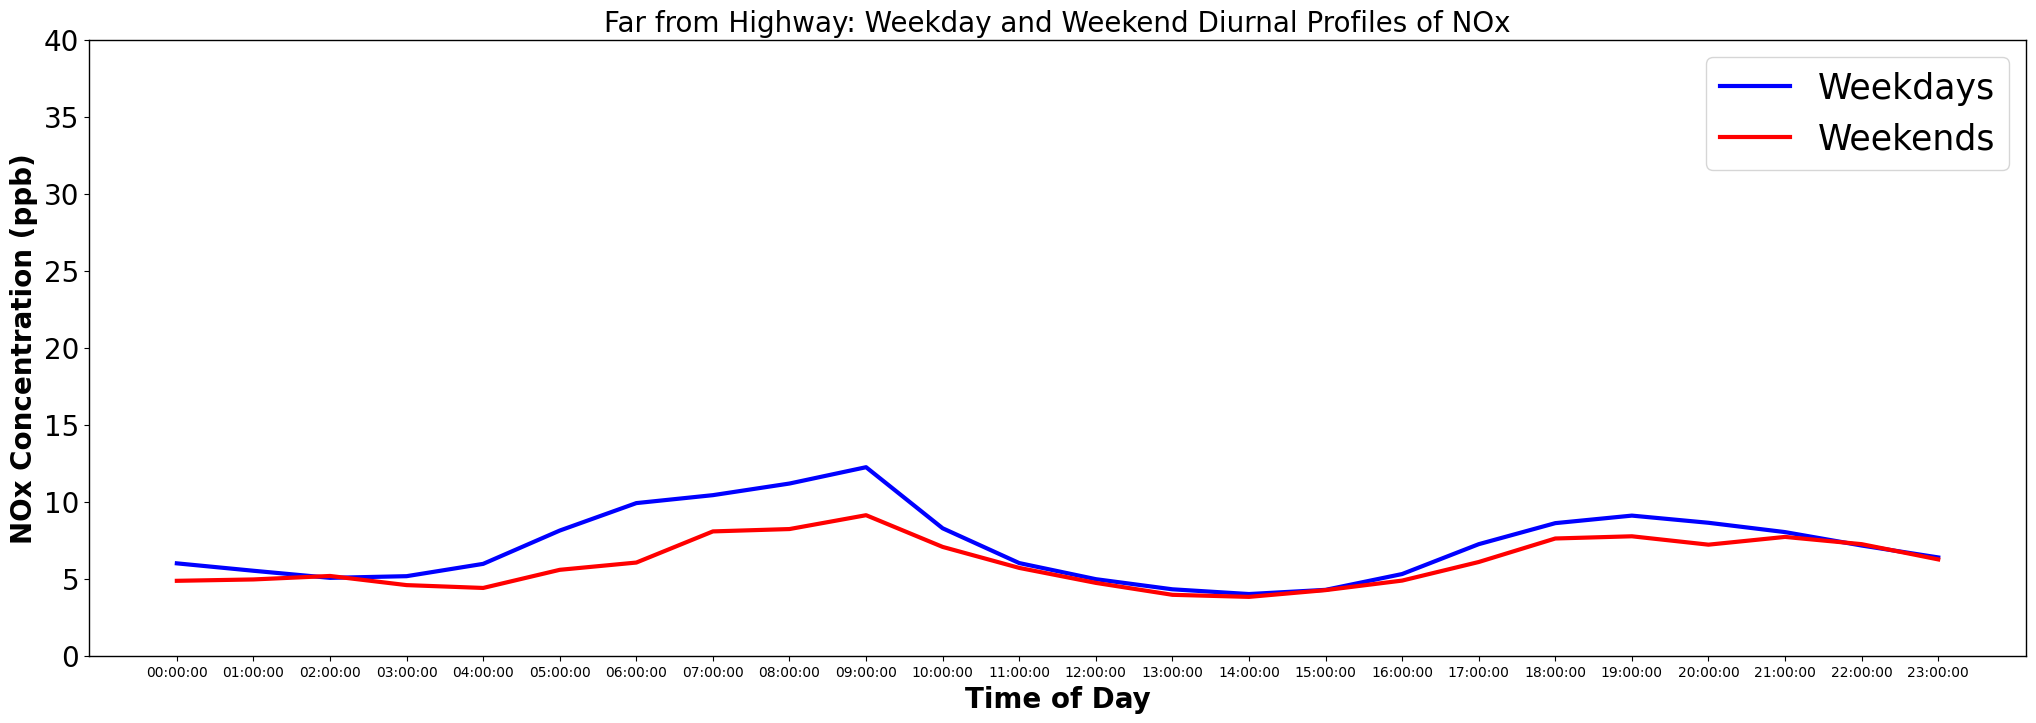

In [ ]:
## Plotting the FAR from the highway site:
plt.figure(figsize = (25, 8))
plt.plot(grouped_weekdays_far.index.astype('str'), grouped_weekdays_far['nox'], label = "Weekdays", color = 'blue') # plots grouped_weekdays_far
plt.plot(grouped_weekends_far.index.astype('str'), grouped_weekends_far['nox'], label = "Weekends", color = 'red') # plots grouped_weekends_far
plt.legend(fontsize = 25) # specifies what legend looks like
plt.xticks(fontsize = 10) # specifies how many x ticks for x-axis to have
plt.ylim(0, 40) # sets the range for the y axis
plt.xlabel("Time of Day") # x-axis label
plt.ylabel("NOx Concentration (ppb)") # y-axis label
plt.title("Far from Highway: Weekday and Weekend Diurnal Profiles of NOx"); # title label

**What do you observe?**<br>Write a few sentences analyzing how the highway influences the weekend effect based on the two graphs produced above. Can you see a bigger difference in weekend and weekday NOx concentrations at the near highway site or far from highway site?

**Your answer:**<br>
Double-click here and replace this text with your response.

**Consider this**<br>Here we have investigated how NO and NO2 (NOx) concentrations change from weekday to weekend. Ozone (O3) is a pollutant affected by NOx concentrations. Do a Google search on how O3 concentrations change from weekday to weekends, and summarize your findings in a few sentences below.

**Your answer:**<br>
Double-click here and replace this text with your response.

***
#### You've finished with the **Air Pollutant Exposure *In Class* notebook** and are ready to begin the **Air Polluntant Exposure *Student Exploration* notebook**! Good job!